In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
pwd

'/Users/ginaleonardi/Documents/project_1_gina'

In [3]:
csv_path = "PUFS copy 3/clean_master_merge.csv"

In [4]:
puf_df = pd.read_csv(csv_path)

puf_df

,SCRAM,ANXIOUS,WORRY,INTEREST,DOWN,EEDUC,RRACE,TBIRTH_YEAR,RHISPANIC,RRACE.1,...,GENID_DESCRIBE,SEXUAL_ORIENTATION,ANYWORK,WEEK,INCOME,TENURE,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,EST_ST
0,V410000001S10011174410111,2.0,2.0,2.0,2.0,7,2,1974,1,2,...,2.0,2.0,1.0,2021-12-29,5.0,3.0,NaN,NaN,1.0,1
1,V410000001S18010684900121,4.0,4.0,4.0,4.0,7,1,1986,1,1,...,2.0,2.0,1.0,2021-12-29,5.0,2.0,1.0,1.0,NaN,1
2,V410000001S30011241510121,1.0,1.0,2.0,2.0,5,1,1986,1,1,...,1.0,2.0,2.0,2021-12-29,1.0,1.0,NaN,NaN,NaN,1
3,V410000001S30011770510111,2.0,1.0,2.0,2.0,6,1,1976,1,1,...,2.0,2.0,1.0,2021-12-29,4.0,2.0,NaN,NaN,NaN,1
4,V410000001S37010270800121,1.0,1.0,1.0,1.0,7,1,1953,1,1,...,1.0,2.0,1.0,2021-12-29,5.0,3.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821716,V530068500,2.0,1.0,1.0,1.0,4,1,1997,1,1,...,1.0,2.0,1.0,2022-01-23,NaN,1.0,NaN,NaN,NaN,47
821717,V530068501,2.0,2.0,1.0,1.0,3,1,1969,2,1,...,1.0,1.0,1.0,2022-01-23,3.0,2.0,NaN,NaN,NaN,41
821718,V530068502,NaN,NaN,NaN,NaN,6,3,1983,1,3,...,2.0,2.0,1.0,2022-01-23,NaN,NaN,NaN,1.0,NaN,26
821719,V530068503,1.0,1.0,2.0,2.0,7,1,1967,1,1,...,1.0,3.0,1.0,2022-01-23,7.0,1.0,NaN,NaN,NaN,48


In [5]:
# Drop all nAn values

puf_df = puf_df.dropna(subset=['ANXIOUS', 'WORRY', 'INTEREST', 'DOWN'])

puf_df = puf_df.drop(['SCRAM', 'RRACE.1','EEDUC.1'], axis=1)

puf_df

,ANXIOUS,WORRY,INTEREST,DOWN,EEDUC,RRACE,TBIRTH_YEAR,RHISPANIC,MS,EGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,ANYWORK,WEEK,INCOME,TENURE,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,EST_ST
0,2.0,2.0,2.0,2.0,7,2,1974,1,3.0,2,2.0,2.0,1.0,2021-12-29,5.0,3.0,NaN,NaN,1.0,1
1,4.0,4.0,4.0,4.0,7,1,1986,1,1.0,2,2.0,2.0,1.0,2021-12-29,5.0,2.0,1.0,1.0,NaN,1
2,1.0,1.0,2.0,2.0,5,1,1986,1,5.0,1,1.0,2.0,2.0,2021-12-29,1.0,1.0,NaN,NaN,NaN,1
3,2.0,1.0,2.0,2.0,6,1,1976,1,3.0,2,2.0,2.0,1.0,2021-12-29,4.0,2.0,NaN,NaN,NaN,1
4,1.0,1.0,1.0,1.0,7,1,1953,1,3.0,1,1.0,2.0,1.0,2021-12-29,5.0,3.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821715,4.0,4.0,4.0,4.0,5,1,1983,1,5.0,2,2.0,2.0,1.0,2022-01-23,5.0,2.0,NaN,NaN,NaN,19
821716,2.0,1.0,1.0,1.0,4,1,1997,1,3.0,1,1.0,2.0,1.0,2022-01-23,NaN,1.0,NaN,NaN,NaN,47
821717,2.0,2.0,1.0,1.0,3,1,1969,2,1.0,1,1.0,1.0,1.0,2022-01-23,3.0,2.0,NaN,NaN,NaN,41
821719,1.0,1.0,2.0,2.0,7,1,1967,1,1.0,1,1.0,3.0,1.0,2022-01-23,7.0,1.0,NaN,NaN,NaN,48


In [6]:
#Question: Homeowners and renters experiences of feelings of anxious, worry, interest, and down.

#Data Info: 
    #Homeowner Responses: 1, owned free&clear, 2 own with mortgage; 3 are renters, 4 - occupied/no rent payment
    #Feelings responses: 1 - not at all; 2 - several days; 3 - more than half days; 4 - nearly every day

In [7]:
#Reduce to targeted columns
home_puf = puf_df[["WEEK",
                   "TENURE",
                   "INCOME",
                   "ANXIOUS", 
                   "WORRY", 
                   "INTEREST", 
                   "DOWN" 
]]


#rename columns
homeowner_df = home_puf.rename(columns={"TENURE": "Homeownership",
                                      "INCOME": "Income"})

homeowner_df

,WEEK,Homeownership,Income,ANXIOUS,WORRY,INTEREST,DOWN
0,2021-12-29,3.0,5.0,2.0,2.0,2.0,2.0
1,2021-12-29,2.0,5.0,4.0,4.0,4.0,4.0
2,2021-12-29,1.0,1.0,1.0,1.0,2.0,2.0
3,2021-12-29,2.0,4.0,2.0,1.0,2.0,2.0
4,2021-12-29,3.0,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
821715,2022-01-23,2.0,5.0,4.0,4.0,4.0,4.0
821716,2022-01-23,1.0,NaN,2.0,1.0,1.0,1.0
821717,2022-01-23,2.0,3.0,2.0,2.0,1.0,1.0
821719,2022-01-23,1.0,7.0,1.0,1.0,2.0,2.0


In [8]:
#Drop NAN
homeowner_df = homeowner_df.dropna()
homeowner_df

,WEEK,Homeownership,Income,ANXIOUS,WORRY,INTEREST,DOWN
0,2021-12-29,3.0,5.0,2.0,2.0,2.0,2.0
1,2021-12-29,2.0,5.0,4.0,4.0,4.0,4.0
2,2021-12-29,1.0,1.0,1.0,1.0,2.0,2.0
3,2021-12-29,2.0,4.0,2.0,1.0,2.0,2.0
4,2021-12-29,3.0,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
821714,2022-01-23,1.0,5.0,3.0,2.0,1.0,2.0
821715,2022-01-23,2.0,5.0,4.0,4.0,4.0,4.0
821717,2022-01-23,2.0,3.0,2.0,2.0,1.0,1.0
821719,2022-01-23,1.0,7.0,1.0,1.0,2.0,2.0


In [9]:
#Group DataFrame by Homeownership
homeowner_group = homeowner_df.groupby('Homeownership')

In [10]:
#Create new dataframe showing average feelings by Homeownership response
home_average_feelings = homeowner_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean()

home_average_feelings

,ANXIOUS,WORRY,INTEREST,DOWN
Homeownership,,,,
1.0,1.687031,1.548151,1.506849,1.491378
2.0,1.939005,1.733834,1.642951,1.628710
3.0,2.266441,2.066599,1.961323,1.964489
4.0,2.308638,2.162133,2.073849,2.078263


In [11]:
#Display the count of respose for each homeowner type
homeowner_group["Homeownership"].count()

Homeownership
1.0    180401
2.0    308958
3.0    160767
4.0      8382
Name: Homeownership, dtype: int64

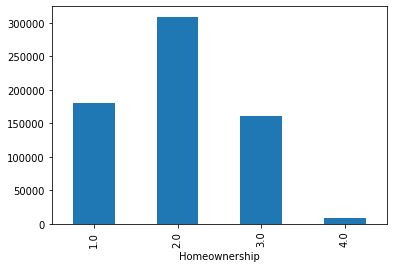

In [12]:
#Plot the count of each homeowner type
homeowner_group["Homeownership"].count().plot(kind='bar')

In [13]:
#Display summary stats for each homeowner group
homeowner_group["ANXIOUS"].describe()

,count,mean,std,min,25%,50%,75%,max
Homeownership,,,,,,,,
1.0,180401.0,1.687031,0.922765,1.0,1.0,1.0,2.0,4.0
2.0,308958.0,1.939005,1.002877,1.0,1.0,2.0,2.0,4.0
3.0,160767.0,2.266441,1.101416,1.0,1.0,2.0,3.0,4.0
4.0,8382.0,2.308638,1.166415,1.0,1.0,2.0,4.0,4.0


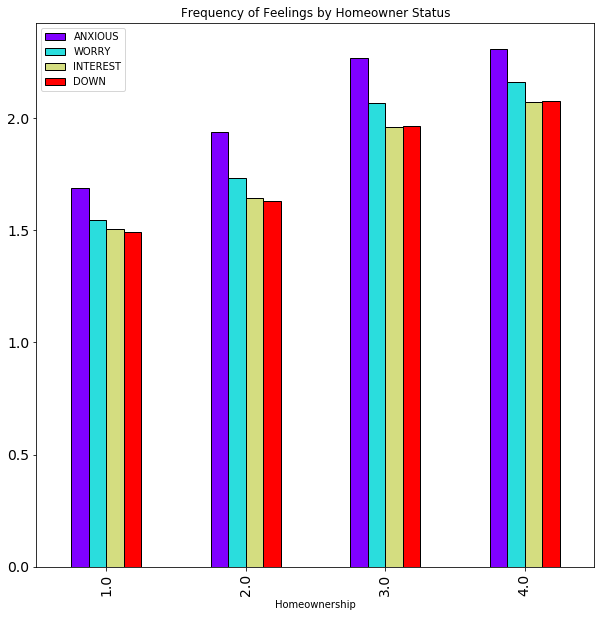

In [78]:
#Plot average feelings responses based on homeowner status

home_plot = homeowner_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean().plot(kind='bar',
    figsize=(10, 10),
    cmap='rainbow',
    edgecolor='black',
    fontsize=14,
    title='Frequency of Feelings by Homeowner Status'
    )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19b73b610>,
      dtype=object)

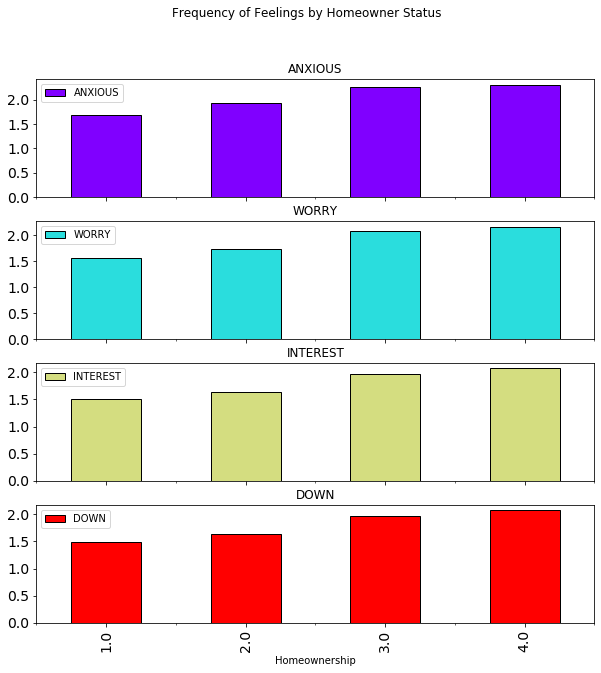

In [15]:
#Separate combined plot by each feeling

homeowner_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean().plot(kind='bar',
    figsize=(10, 10),
    cmap='rainbow',
    edgecolor='black',
    fontsize=14,
    title='Frequency of Feelings by Homeowner Status',
    subplots=True
    )

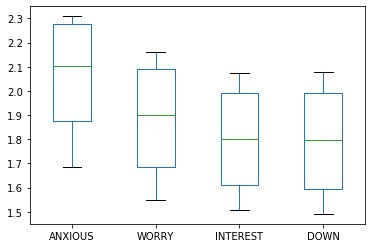

In [68]:
#Create a boxplot displaying summary data on responses for each feeling across all homeowner types.
homeowner_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean().plot(kind='box')

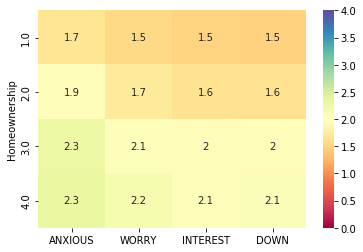

In [74]:
#Display a heatmap coorelation chart showing average feelings based on homeowner status. 
#Title: count of feeling response by homeowner status

ax = sns.heatmap(home_average_feelings, vmax=4, vmin=0, annot=True, cmap='Spectral')
plt.show()

In [23]:
#Group DataFrame by Income
#Average feelings by Income
#Income bins: 
    #1) Less than $25,000  
    #2) $25,000 - $34,999  
    #3) $35,000 - $49,999   
    #4) $50,000 - $74,999   
    #5) $75,000 - $99,999   
    #6) $100,000 - $149,999   
    #7) $150,000 - $199,999
    #8) $200,000 and above

income_group = homeowner_df.groupby('Income')

In [24]:
#Create dataframe showing average feelings experienced for each income level

inc_average_feelings = income_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean()

inc_average_feelings

,ANXIOUS,WORRY,INTEREST,DOWN
Income,,,,
1.0,2.355481,2.209475,2.135864,2.118443
2.0,2.161168,2.015586,1.934169,1.916761
3.0,2.080872,1.917205,1.841902,1.823907
4.0,1.980223,1.802013,1.720838,1.704861
5.0,1.902749,1.712335,1.629028,1.618570
6.0,1.829335,1.623326,1.539222,1.532304
7.0,1.756914,1.542734,1.455567,1.453952
8.0,1.680207,1.461610,1.383399,1.390576


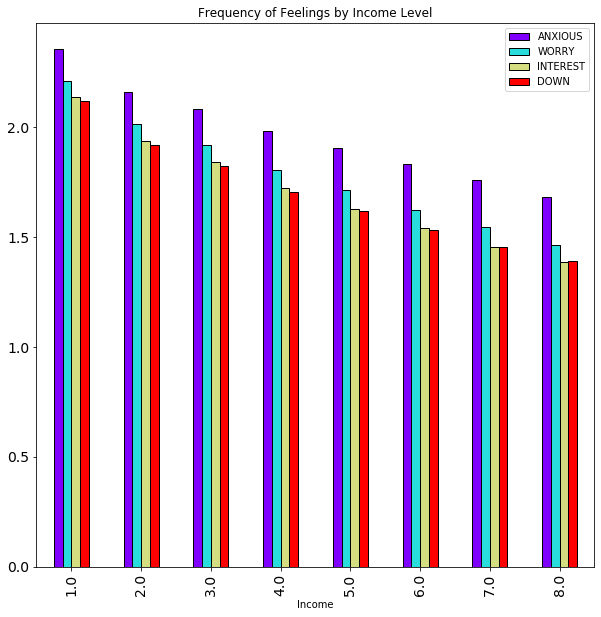

In [25]:
#Plot average feelings responses based on income level

income_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean().plot(kind='bar',
    figsize=(10, 10),
    cmap='rainbow',
    edgecolor='black',
    fontsize=14,
    title='Frequency of Feelings by Income Level')

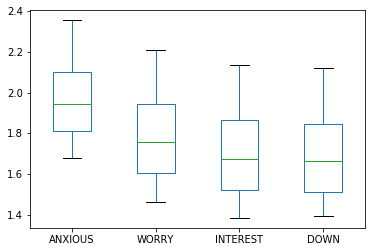

In [72]:
#Boxplots displaying summary data for each feeling over all income levels.
income_group[["ANXIOUS", "WORRY", "INTEREST", "DOWN"]].mean().plot.box()


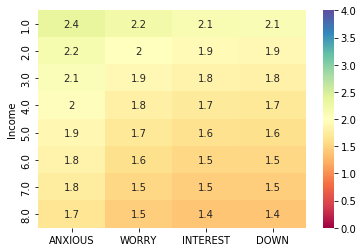

In [77]:
#Plot heatmap displaying average response 

ax = sns.heatmap(inc_average_feelings, vmax=4, vmin=0, annot=True, cmap='Spectral')
plt.show()